## Import Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

## Define Constants

In [3]:
DATA_DIR = '../data/'
TRAIN_Q, TRAIN_C, TRAIN_A, TRAIN_S = 'train.question', 'train.context', 'train.answer', 'train.span'
DEV_Q, DEV_C, DEV_A, DEV_S = 'dev.question', 'dev.context', 'dev.answer', 'dev.span'

## Define Utility Functions

In [35]:
def plot_line_lens(filename, num_bins=30, title=None):
    """Plot a histogram of the number of words per line in a file.
    """
    with open(os.path.join(DATA_DIR, filename), 'r') as f:
        lines = f.readlines()
        lens = [len(line.split()) for line in lines]
        hist, bins = np.histogram(lens, bins=30)
        bin_width = 0.8 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2
        plt.bar(center, hist, align='center', width=bin_width)
        if title is not None:
            plt.title(title)
        plt.show()

## Questions
---

### Training Set Questions

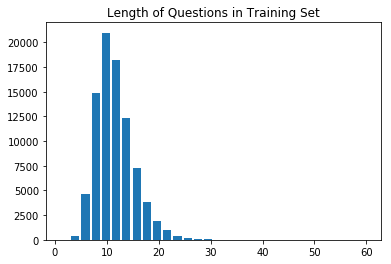

In [36]:
plot_line_lens(TRAIN_Q, title='Length of Questions in Training Set')

### Dev Set Questions

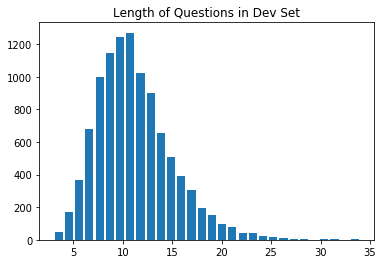

In [40]:
plot_line_lens(DEV_Q, title='Length of Questions in Dev Set')

## Contexts
---

### Training Set Contexts

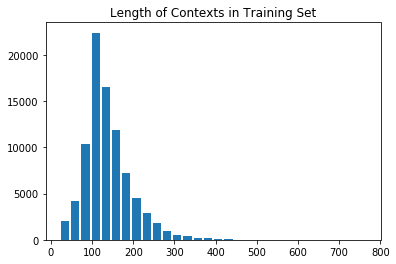

In [33]:
plot_line_lens(TRAIN_C, title='Length of Contexts in Training Set')

In [11]:
max_c_len = 360
truncated, total = 0, 0
with open(os.path.join(DATA_DIR, TRAIN_C), 'r') as fh:
    lines = fh.readlines()
    total = len(lines)
    truncated = len([line for line in lines if len(line.split()) >= max_c_len])

print("{} / {} = {:.2f}% truncated".format(truncated, total, float(truncated) / float(total) * 100.))

414 / 86318 = 0.48% truncated


### Dev Set Contexts

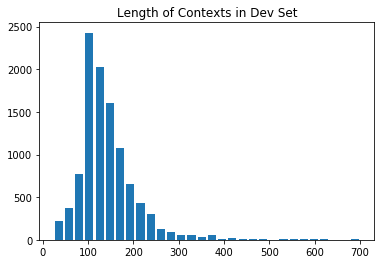

In [39]:
plot_line_lens(DEV_C, title='Length of Contexts in Dev Set')

In [12]:
max_c_len = 360
truncated, total = 0, 0
with open(os.path.join(DATA_DIR, DEV_C), 'r') as fh:
    lines = fh.readlines()
    total = len(lines)
    truncated = len([line for line in lines if len(line.split()) >= max_c_len])

print("{} / {} = {:.2f}% truncated".format(truncated, total, float(truncated) / float(total) * 100.))

145 / 10391 = 1.40% truncated


## Answers
---------

### Training Set Answers

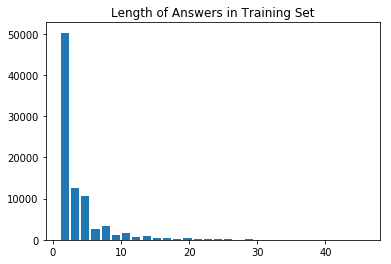

In [37]:
plot_line_lens(TRAIN_A, title='Length of Answers in Training Set')

### Dev Set Answers

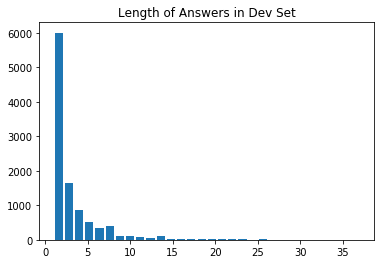

In [38]:
plot_line_lens(DEV_A, title='Length of Answers in Dev Set')

## Conclusions
---

### Hyperparameters for Reduced Model Size
1. *Questions:* `question_len <= 30`
2. *Contexts:* `context_len <= 400`
3. *Answers:* `max_span_len <= 25`